<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_Kaggle(6_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KERAS CNN DOG OR CAT CLASSIFICATION
## Import Library


In [112]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


In [71]:
print(os.listdir("/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat"))

['train_700', 'test_500']


## Define constants

In [72]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## Prepare Training Data


In [73]:
filenames = os.listdir('/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/train_700')
categories=[]
for filename in filenames:
  category = filename.split('.')[0]
  if category=='dog':
    categories.append(1)
  else:
    categories.append(0)
df=pd.DataFrame({
    'filename':filename, 'category':categories})

In [74]:
df.head()

,filename,category
0,cat.369.jpg,0
1,cat.369.jpg,1
2,cat.369.jpg,1
3,cat.369.jpg,1
4,cat.369.jpg,1


In [75]:
df.tail()

,filename,category
1407,cat.369.jpg,0
1408,cat.369.jpg,0
1409,cat.369.jpg,0
1410,cat.369.jpg,1
1411,cat.369.jpg,0


## See total in count

<Axes: >

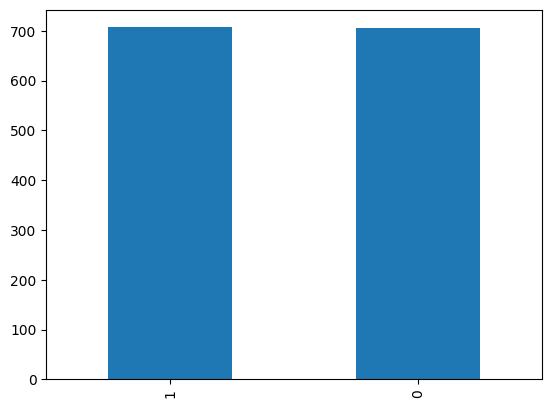

In [76]:
df['category'].value_counts().plot.bar()

## SEe sample image

In [130]:
from tensorflow.keras.utils import load_img


In [138]:
sample = random.choice(filename)
image = load_img('/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/train_700'+ sample)
plt.imshow(image)

FileNotFoundError: ignored

## Build Model
Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

In [82]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_cross_entropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

## Callbacks


In [83]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop=EarlyStopping(patience=10)

In [84]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)


In [86]:
callbacks=[earlystop, learning_rate_reduction]

## Prepare data

In [87]:
df['category']=df['category'].replace({0:'cat', 1:'dog'})

In [88]:
df.head()

,filename,category
0,cat.369.jpg,cat
1,cat.369.jpg,dog
2,cat.369.jpg,dog
3,cat.369.jpg,dog
4,cat.369.jpg,dog


In [89]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

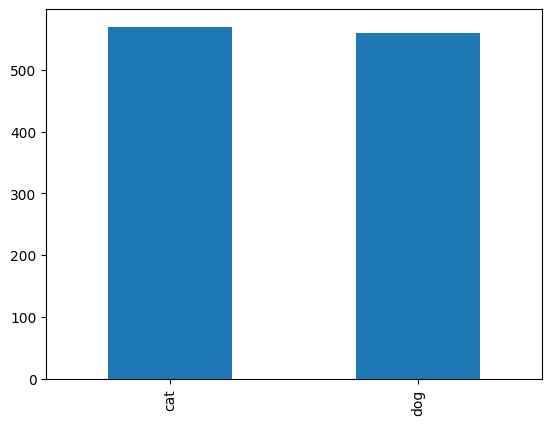

In [90]:
train_df['category'].value_counts().plot.bar()

<Axes: >

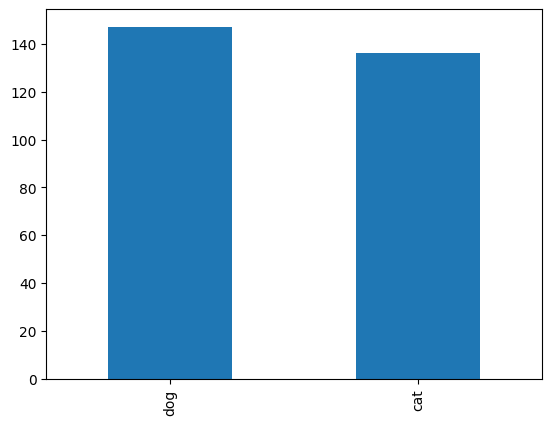

In [91]:
validate_df['category'].value_counts().plot.bar()

In [92]:
total_train =train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

## Training Generator


In [93]:
train_datagen=ImageDataGenerator(rotation_range=15, rescale=1./255, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

train_generator=train_datagen.flow_from_dataframe(train_df, '/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/train_700', x_col='filename', y_col='category', target_size=IMAGE_SIZE,
                                                 class_mode='categorical', batch_size=batch_size )

Found 1129 validated image filenames belonging to 2 classes.


In [94]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/train_700", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 283 validated image filenames belonging to 2 classes.


#See how our generator work

In [95]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/train_700", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


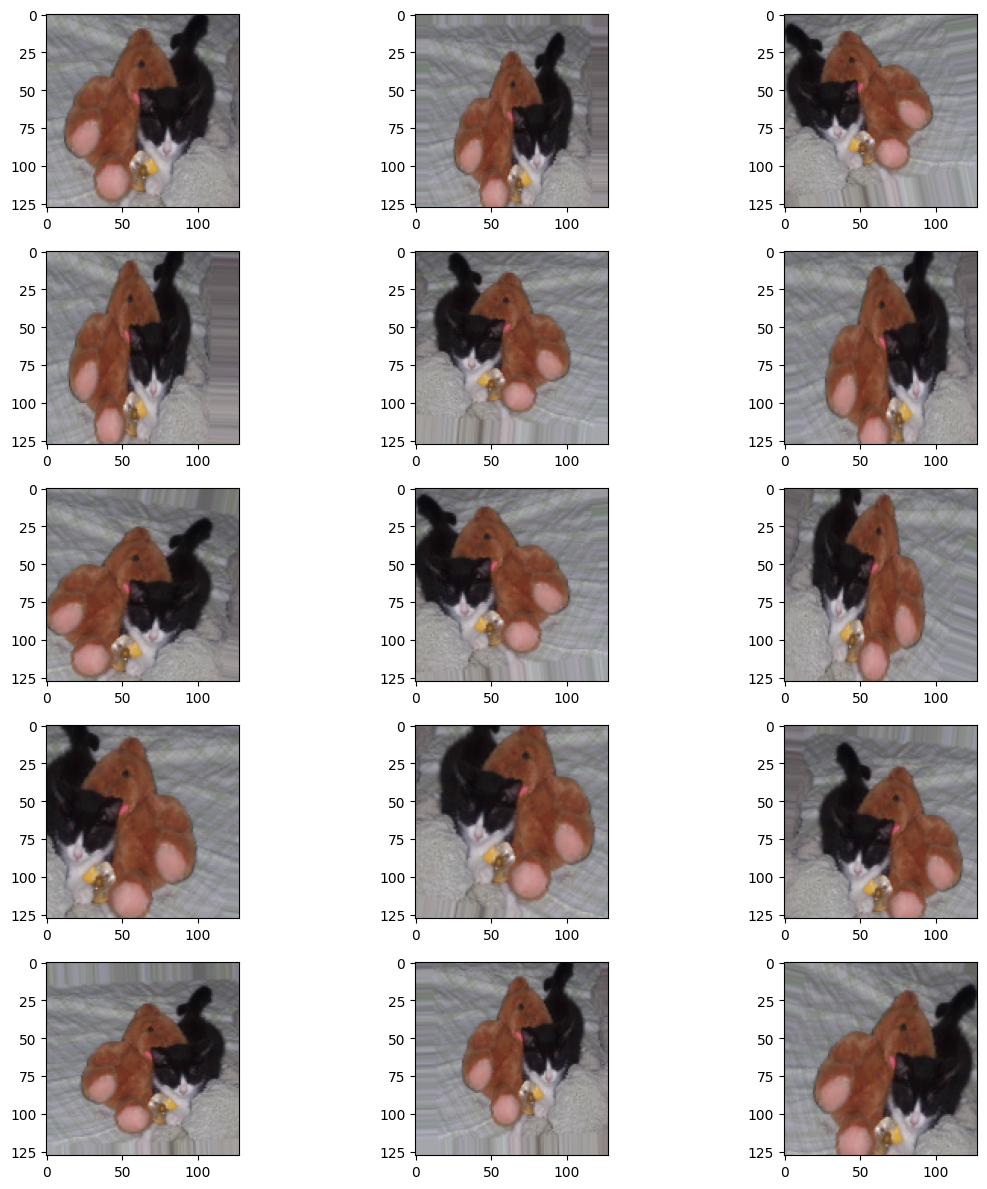

In [96]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit model

In [116]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [117]:

epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
    callbacks=callbacks
)

<ipython-input-117-945f4c1946e3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
76/75 [==============================] - ETA: 0s - loss: 1.1851 - accuracy: 0.4978

75/75 [==============================] - 73s 941ms/step - loss: 1.1851 - accuracy: 0.4978 - val_loss: 2.0555 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 2/50
76/75 [==============================] - ETA: 0s - loss: 0.9410 - accuracy: 0.4801

75/75 [==============================] - 69s 916ms/step - loss: 0.9410 - accuracy: 0.4801 - val_loss: 4.0066 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 3/50
76/75 [==============================] - ETA: 0s - loss: 0.8680 - accuracy: 0.5164

75/75 [==============================] - 70s 925ms/step - loss: 0.8680 - accuracy: 0.5164 - val_loss: 5.2899 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 4/50
76/75 [==============================] - ETA: 0s - loss: 0.8609 - accuracy: 0.4792

75/75 [==============================] - 68s 910ms/step - loss: 0.8609 - accuracy: 0.4792 - val_loss: 4.5158 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 5/50
76/75 [==============================] - ETA: 0s - loss: 0.8359 - accuracy: 0.5164

75/75 [==============================] - 68s 908ms/step - loss: 0.8359 - accuracy: 0.5164 - val_loss: 2.1845 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 6/50
76/75 [==============================] - ETA: 0s - loss: 0.8109 - accuracy: 0.4969

75/75 [==============================] - 67s 885ms/step - loss: 0.8109 - accuracy: 0.4969 - val_loss: 0.6974 - val_accuracy: 0.4806 - lr: 0.0100
Epoch 7/50
76/75 [==============================] - ETA: 0s - loss: 0.7850 - accuracy: 0.5306

75/75 [==============================] - 71s 942ms/step - loss: 0.7850 - accuracy: 0.5306 - val_loss: 0.8298 - val_accuracy: 0.4806 - lr: 0.0100
Epoch 8/50
76/75 [==============================] - ETA: 0s - loss: 0.8074 - accuracy: 0.5049

75/75 [==============================] - 71s 945ms/step - loss: 0.8074 - accuracy: 0.5049 - val_loss: 0.8461 - val_accuracy: 0.4806 - lr: 0.0100
Epoch 9/50
76/75 [==============================] - ETA: 0s - loss: 0.7934 - accuracy: 0.5022

75/75 [==============================] - 70s 924ms/step - loss: 0.7934 - accuracy: 0.5022 - val_loss: 0.7060 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 10/50
76/75 [==============================] - ETA: 0s - loss: 0.7835 - accuracy: 0.5075

75/75 [==============================] - 69s 915ms/step - loss: 0.7835 - accuracy: 0.5075 - val_loss: 0.6996 - val_accuracy: 0.4806 - lr: 0.0100
Epoch 11/50
76/75 [==============================] - ETA: 0s - loss: 0.7938 - accuracy: 0.4996

75/75 [==============================] - 69s 913ms/step - loss: 0.7938 - accuracy: 0.4996 - val_loss: 0.7232 - val_accuracy: 0.4806 - lr: 0.0100
Epoch 12/50
76/75 [==============================] - ETA: 0s - loss: 0.8129 - accuracy: 0.5031

75/75 [==============================] - 70s 926ms/step - loss: 0.8129 - accuracy: 0.5031 - val_loss: 0.7165 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 13/50
76/75 [==============================] - ETA: 0s - loss: 0.7964 - accuracy: 0.5075

75/75 [==============================] - 70s 932ms/step - loss: 0.7964 - accuracy: 0.5075 - val_loss: 0.8302 - val_accuracy: 0.4806 - lr: 0.0100
Epoch 14/50
76/75 [==============================] - ETA: 0s - loss: 0.8186 - accuracy: 0.4872

75/75 [==============================] - 68s 910ms/step - loss: 0.8186 - accuracy: 0.4872 - val_loss: 0.7374 - val_accuracy: 0.5194 - lr: 0.0100
Epoch 15/50
76/75 [==============================] - ETA: 0s - loss: 0.8143 - accuracy: 0.4730

75/75 [==============================] - 68s 908ms/step - loss: 0.8143 - accuracy: 0.4730 - val_loss: 0.7264 - val_accuracy: 0.4806 - lr: 0.0100
Epoch 16/50
76/75 [==============================] - ETA: 0s - loss: 0.7923 - accuracy: 0.5164

75/75 [==============================] - 70s 918ms/step - loss: 0.7923 - accuracy: 0.5164 - val_loss: 0.6986 - val_accuracy: 0.4806 - lr: 0.0100


# virtualize Trainig


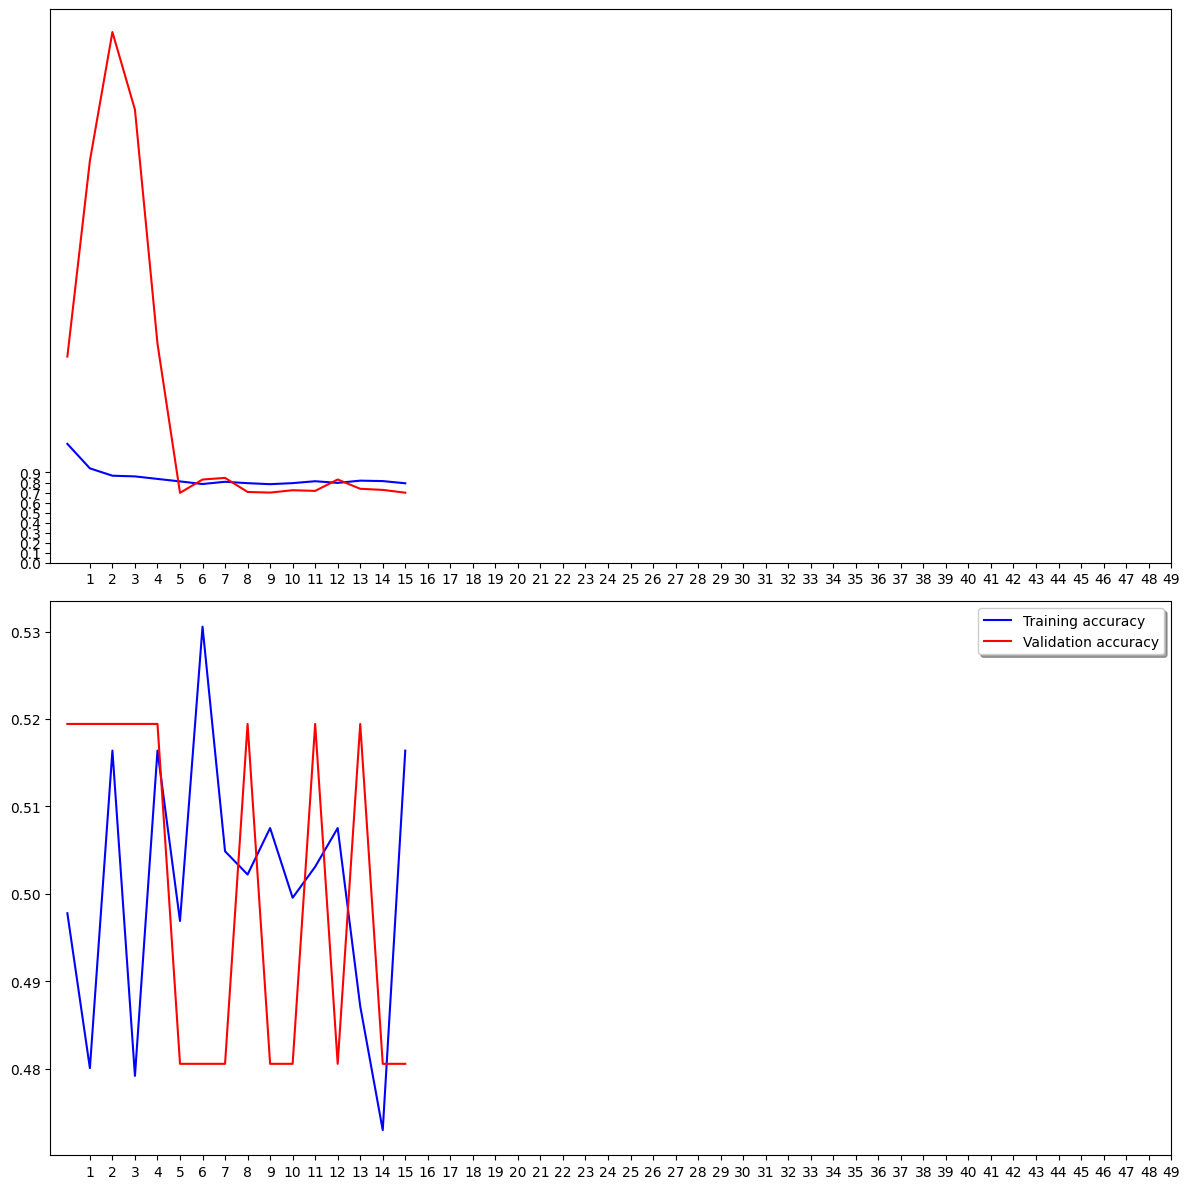

In [120]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing DAta

In [121]:
test_filenames = os.listdir("/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/test_500")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# CREate Testing Generator

In [122]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/test_500", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 500 validated image filenames.


# PRedict


In [123]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-123-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [124]:
test_df['category'] = np.argmax(predict, axis=-1)

In [125]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [126]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<Axes: >

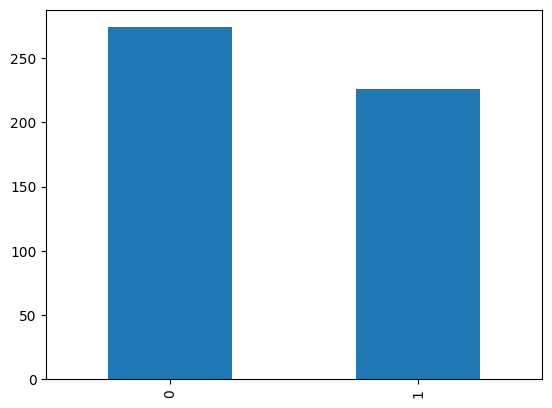

In [127]:
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/ESAA/OB/kaggle_dogorcat/test_500"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
# SUBMISSION
# submission_df = test_df.copy()
#submission_df['id'] = submission_df['filename'].str.split('.').str[0]
#submission_df['label'] = submission_df['category']
#submission_df.drop(['filename', 'category'], axis=1, inplace=True)
#submission_df.to_csv('submission.csv', index=False)